# car price predictor project

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
data=pd.read_csv("cardata.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [30]:
# domain analysis & basic checks
# finding insights  from data like no of rows, column, datatype, info & more.

In [3]:
# shape
data.shape

(301, 9)

In [7]:
# print all columns 
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
# dtypes 
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [9]:
# head 
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# tail
data.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [11]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
# describe
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
# check for missing values 
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# checking the distribution of categorical data 
# for fuel type 
print(data.Fuel_Type.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [7]:
# for seller type 
print(data.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [8]:
# for transmission type
print(data.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
# encoding categorical data into numbers 
# encoding fuel type column 
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [10]:
# for seller columns
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [11]:
# for transmission columns
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
# converted data into numerical values 

In [13]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Finding car age 

In [14]:
import datetime 
date_time = datetime.datetime.now()
data['Age']=date_time.year - data['Year']

In [15]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,9
1,sx4,2013,4.75,9.54,43000,1,0,0,0,10
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,12
4,swift,2014,4.60,6.87,42450,1,0,0,0,9


In [16]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,9
1,sx4,2013,4.75,9.54,43000,1,0,0,0,10
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,12
4,swift,2014,4.60,6.87,42450,1,0,0,0,9


# exploratory data anaysis

<Axes: ylabel='Density'>

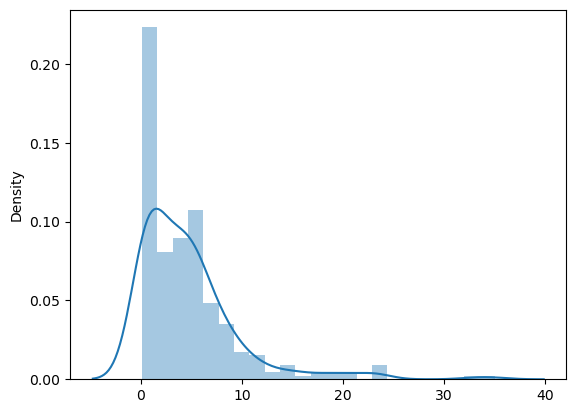

In [17]:
# checking distrubation for  for selling price 
sns.distplot(x=data.Selling_Price	)

<Axes: xlabel='Selling_Price'>

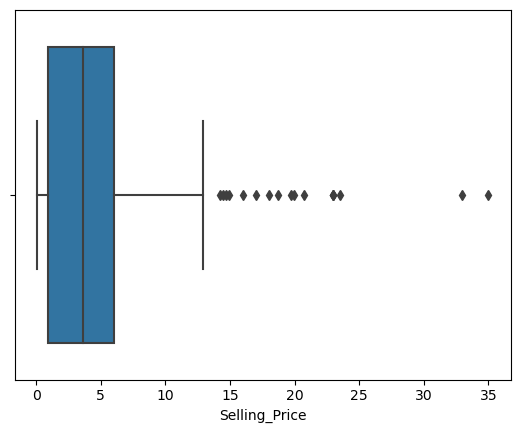

In [18]:
sns.boxplot(x=data.Selling_Price)

# as we observe selling price has some outliers 
# & data is not normal so lets handle it by IQR method
# find Q1 & Q3

In [19]:
Q1 = data['Selling_Price'].quantile(0.25)
print("Q1:",Q1)


Q1: 0.9


In [20]:
Q3= data['Selling_Price'].quantile(0.75)
print("Q3:",Q3)

Q3: 6.0


In [21]:
IQR=Q3-Q1
print(IQR)

5.1


In [22]:
lower_limit = Q1 - (1.5 * IQR)
print(lower_limit)


-6.749999999999999


In [23]:
upper_limit = Q3 + (1.5 * IQR)
print(upper_limit)

13.649999999999999


In [24]:
# find values above upper limit
data.loc[data['Selling_Price']>upper_limit]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
50,fortuner,2012,14.90,30.61,104707,1,0,1,0,11
51,fortuner,2015,23.00,30.61,40000,1,0,1,0,8
52,innova,2017,18.00,19.77,15000,1,0,1,0,6
53,fortuner,2013,16.00,30.61,135000,1,1,1,0,10
59,fortuner,2014,19.99,35.96,41000,1,0,1,0,9
62,fortuner,2014,18.75,35.96,78000,1,0,1,0,9
63,fortuner,2015,23.50,35.96,47000,1,0,1,0,8
64,fortuner,2017,33.00,36.23,6000,1,0,1,0,6
66,innova,2017,19.75,23.15,11000,0,0,1,0,6
69,corolla altis,2016,14.25,20.91,12000,0,0,0,0,7


In [25]:
len(data.loc[data['Selling_Price']>upper_limit])/len(data)

0.05647840531561462

In [26]:
# find values above lower limit
data.loc[data['Selling_Price']<lower_limit]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age


In [27]:
# how to handle outliers 
# since data is not normal will replace outliers with median 
data.loc[data["Selling_Price"]>upper_limit,"Selling_Price"]=data["Selling_Price"].median()

<Axes: xlabel='Selling_Price'>

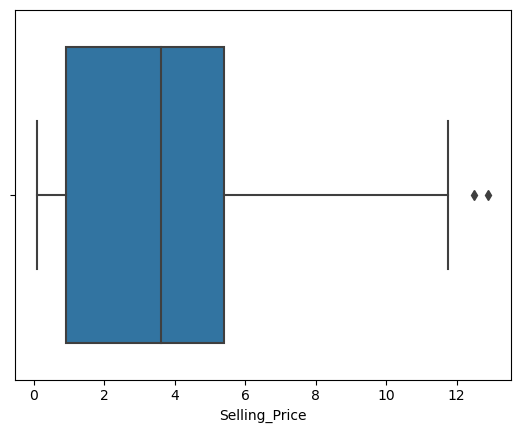

In [28]:
# check are there ay outliers in Selling_Price
sns.boxplot(x=data.Selling_Price)

<Axes: xlabel='Selling_Price'>

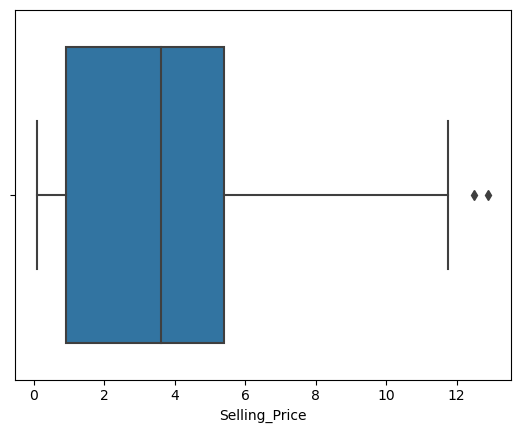

In [29]:
sns.boxplot(x=data.Selling_Price)

# feature engineering

In [30]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Year,1.000000,0.273010,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104,-1.000000
Selling_Price,0.273010,1.000000,0.454004,-0.003117,0.381252,-0.735550,0.024056,-0.095131,-0.273010
Present_Price,-0.047584,0.454004,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057,0.047584
Kms_Driven,-0.524342,-0.003117,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.053643,0.381252,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Seller_Type,-0.039896,-0.735550,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,-0.000394,0.024056,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.182104,-0.095131,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
Age,-1.000000,-0.273010,0.047584,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


<Axes: >

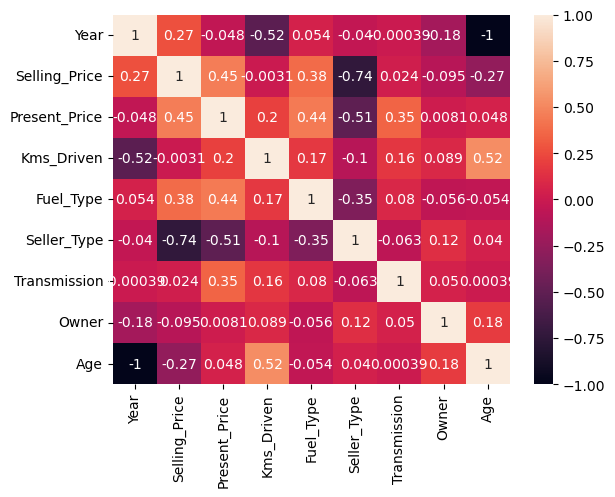

In [31]:
sns.heatmap(data.corr(),annot=True)

# split data into x & y

In [32]:
x= data.drop(['Car_Name','Selling_Price'],axis=1)


In [33]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  Age  
0        0    9  
1        0   10  
2        

In [34]:
y = data['Selling_Price']
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting The Dataset Into The Training Set And Test Set

In [35]:
from sklearn.model_selection import train_test_split



In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [37]:
x_train.shape

(240, 8)

In [38]:
x_test.shape

(61, 8)

# model buiding

In [39]:
# import linear regression model 
from sklearn.linear_model import LinearRegression
# initialise model 
model=LinearRegression()
# Train model with x_train and y_train
model.fit(x_train,y_train)


LinearRegression()

In [40]:
# make prediction/ test model
y_pred=model.predict(x_test)
y_pred

array([ 0.60489789,  5.80604052,  5.2499425 ,  0.58225567,  5.34348118,
        5.96146011,  1.22250212,  0.85841973,  1.40104428,  5.75093616,
        6.64744823,  0.71517618,  4.38018414,  0.78103932,  5.45879633,
        4.81943725,  0.37674749,  6.29207549,  1.647304  ,  1.67705741,
        0.59993063,  6.16108135,  5.14209663,  4.11583582,  0.9296272 ,
        4.52287533,  5.01518763,  4.23797101,  1.69865648,  1.45998595,
        0.61809068,  6.00397981, -0.13358854,  3.55954993,  6.31568073,
        5.06696049,  5.2906755 ,  4.35999699,  4.7679398 ,  4.57737879,
        3.11970144,  2.18935287,  4.97751991,  0.98773758,  5.91263333,
        0.6990859 ,  5.38500531,  4.05155303,  4.67178804,  5.10141147,
        4.07625184,  1.67177099,  6.36423704,  6.29678556,  6.0572251 ,
        5.04661924,  5.15667713,  6.31714746,  3.01587712,  4.75514032,
        0.66329233])

In [41]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

In [42]:
# slope / coefficient of x
model.coef_

array([ 1.33650268e-01,  4.51623678e-02,  3.89644751e-06,  5.11782209e-01,
       -3.82694299e+00, -8.36465741e-01,  4.34533793e-01, -1.33650268e-01])

In [43]:
# intercept
model.intercept_

-263.3543384164325

In [44]:
from sklearn import metrics


In [45]:
y_pred1 = model.predict(x_test)

In [46]:
y_pred1

array([ 0.60489789,  5.80604052,  5.2499425 ,  0.58225567,  5.34348118,
        5.96146011,  1.22250212,  0.85841973,  1.40104428,  5.75093616,
        6.64744823,  0.71517618,  4.38018414,  0.78103932,  5.45879633,
        4.81943725,  0.37674749,  6.29207549,  1.647304  ,  1.67705741,
        0.59993063,  6.16108135,  5.14209663,  4.11583582,  0.9296272 ,
        4.52287533,  5.01518763,  4.23797101,  1.69865648,  1.45998595,
        0.61809068,  6.00397981, -0.13358854,  3.55954993,  6.31568073,
        5.06696049,  5.2906755 ,  4.35999699,  4.7679398 ,  4.57737879,
        3.11970144,  2.18935287,  4.97751991,  0.98773758,  5.91263333,
        0.6990859 ,  5.38500531,  4.05155303,  4.67178804,  5.10141147,
        4.07625184,  1.67177099,  6.36423704,  6.29678556,  6.0572251 ,
        5.04661924,  5.15667713,  6.31714746,  3.01587712,  4.75514032,
        0.66329233])

In [47]:
from sklearn import metrics
score1 = metrics.r2_score(y_test,y_pred1)

In [48]:
print(score1)

0.6913185412967382


In [49]:
final_data = pd.DataFrame({'Models':['LR'],
             "R2_SCORE":[score1,]})

In [50]:
final_data

,Models,R2_SCORE
0,LR,0.691319


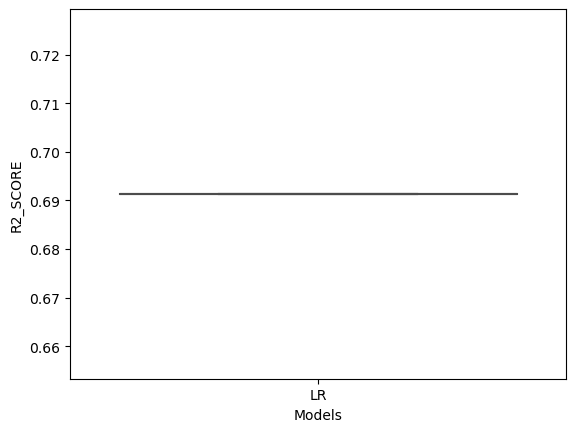

In [51]:
sns. boxplot( y=final_data['R2_SCORE'], x=final_data['Models'],color='red'); 

# Save The Model

In [52]:
model=LinearRegression()
lr_model=model.fit(x,y)

In [53]:
import joblib

In [54]:
joblib.dump(lr_model,'car_price_predictor')

['car_price_predictor']

In [55]:
model = joblib.load('car_price_predictor')

# Prediction on New Data

In [56]:
import pandas as pd
data_new = pd.DataFrame({"Year":2016,
    'Present_Price':5.59,
    'Kms_Driven':28000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

In [57]:
model.predict(data_new)

array([5.45127756])

In [68]:
# GUI for car price predictor 

from tkinter import *
import joblib

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    
    model = joblib.load('car_price_predictor')
    data_new = pd.DataFrame({"Year":p1,
    'Present_Price':p2,
    'Kms_Driven':p3,
    'Fuel_Type':p4,
    'Seller_Type':p5,
    'Transmission':p6,
    'Owner':p7,
    'Age':p8
 },index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Car Purchase amount", result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning By Utkarsh M")
label = Label(master, text = "Car Price Prediction Using Machine Learning By Utkarsh M"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master, text="Year").grid(row=1)
Label(master, text="Present_Price").grid(row=2)
Label(master, text="Kms_Driven").grid(row=3)
Label(master, text="Fuel_Type").grid(row=4)
Label(master, text="Seller_Type").grid(row=5)
Label(master, text="Transmission").grid(row=6)
Label(master, text="Owner").grid(row=7)
Label(master, text="Age").grid(row=8)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)




Button(master, text='Click Here To PredictCar Price (INR)', command=show_entry_fields).grid()







mainloop()

Car Purchase amount 1.6468834651753355
Car Purchase amount 1.2145266010682576
